In [1]:
import os
import pandas as pd
from scipy.spatial import distance
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

#path = "/home/flan3@ad.wisc.edu/SICMA-analysis/BF/Summary/paperdata/passaging/"
path = "/home/flan3@ad.wisc.edu/SICMA-analysis/BF/Summary/paperdata/"
os.chdir(path)
files = os.listdir()
files = [f for f in files if f.find("nodes") != -1]
files
prefix = [f[:-6] for f in files]

In [2]:
#load all the .nodes files into a single dataframe
dfs = []
for f in files:
    dfs.append(pd.read_csv(f, names = ["combo", "count"], header = 0, sep = "\t", index_col = 0).T)
sumtable = pd.concat(dfs, keys = prefix)
sumtable.index = sumtable.index.droplevel(1)

#normalize and fill no data with "0"
sumtable = sumtable.div(sumtable.sum(axis=1), axis=0)
sumtable.fillna(0, inplace = True) #replace the NaN values with 0
data = sumtable
data


,A--E---,-B-E---,ABDE---,A------,A-DE---,A-D----,AB-E---,A--E--H,---E---,A--E-G-,...,-BDEFG-,-BDEFGH,A-DEFG-,AB--FGH,AB-EFGH,ABD-F-H,ABD-FGH,ABDEF-H,ABDEFG-,ABDEFGH
AE-t0.5,0.954752,0.000330,0.000082,0.009890,0.004121,0.000907,0.005934,0.002308,0.014588,0.002473,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t24,0.071069,0.025454,0.002772,0.160408,0.013231,0.022429,0.021925,0.004662,0.105091,0.008191,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
AE-t48,0.073326,0.030893,0.003366,0.151461,0.011540,0.020315,0.023080,0.005650,0.097007,0.010338,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DH-t48,0.077635,0.028554,0.002778,0.160210,0.010881,0.021840,0.020605,0.005248,0.100787,0.009261,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t0.5,0.000000,0.001083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t24,0.072360,0.029801,0.002856,0.157479,0.009997,0.021422,0.021613,0.004951,0.102161,0.007903,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
BG-t48,0.082338,0.030615,0.002791,0.149411,0.008722,0.020497,0.021195,0.004797,0.108417,0.008897,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DH-t0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.001244,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DH-t24,0.075783,0.026359,0.002118,0.175100,0.011061,0.022358,0.018122,0.004942,0.095317,0.007060,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DH-t03,0.010528,0.005931,0.001038,0.056643,0.005486,0.035884,0.002224,0.002076,0.030101,0.000593,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00


In [4]:
#to plot the network, we calculate the adjacency matrix which is all the promoter combos in each condition that are only 1 hamming distance
#away from eachother

#we store them as adjacency lists because that's how networkx likes to input them
adjlists = {}

for lab, d in data.iterrows():
    #OPTIONAL: remove the combos with below cutoff  frequency to reduce stochasticity
    cutoff = 0.000
    d = d[d > cutoff]
    
    #initialize CPSs list
    CPSs = d.index

    #make adjacency list from the matrix for each condition
    adjlist = []
    
    #this is specifically edges only when hamming dist = 1 for the CPSs combos in each condition
    for i in range(len(CPSs)):
        adjlist.append(CPSs[i]) #start off the row with the first entry
        for j in range(i):
            if distance.hamming(list(CPSs[i]), list(CPSs[j]))*len(list(CPSs[i])) == 1:
                adjlist[i] += f" {CPSs[j]}" #space then the connecting node
    adjlists[lab] = adjlist
                        

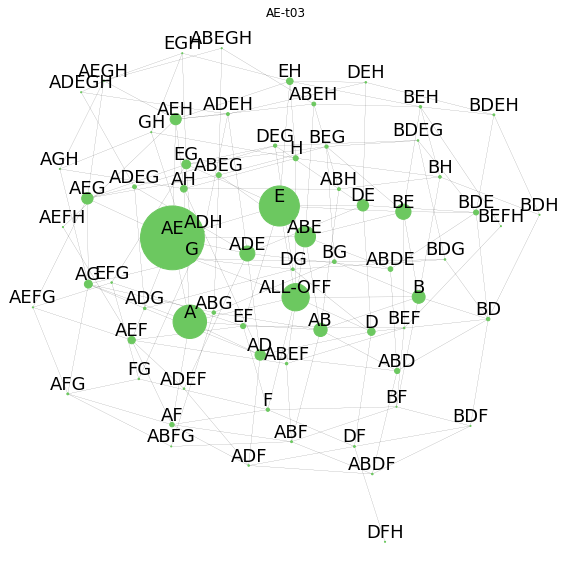

In [9]:
#plot any one dataset as a graph
condition = "AE-t03" #select any one row to plot as a graph

fig, axs = plt.subplots(1,1, figsize = (10,10))
keys = list(adjlists.keys())
ax = axs

#this generates the overall structure (nodes + edges)
G = nx.parse_adjlist(adjlists[condition])
frequencies = [data.loc[condition, n] for n in G.nodes] #frequencies for node sizes

#remove the "-" from node labels
newG = []
for n in G:
    if n == "-------": #All OFF gets special treatment
        newG.append("ALL-OFF")
    else:
        newG.append(n.replace("-",""))
mapping = dict(zip(list(G), newG)) #mapping dictionary to relabel nodes
G = nx.relabel.relabel_nodes(G, mapping) #relabel the nodes 

nx.draw_kamada_kawai(G, with_labels=True, node_size = [f*1e4 for f in frequencies] , node_color = "#6CC860", width = 0.1, font_size = 18, verticalalignment = "bottom", ax = ax)
ax.set_title(condition)

fig.savefig(f"{condition}.svg", format = "svg")